# Medical Cost - Machine Learning Prediction

The goal is to make an automatic system that can predict a medical insurace cost of an individual.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**Data collection and analysis**

In [3]:
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [9]:
# categorical features:
#** sex
#** smoker
#** region

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Data analysis**

/tmp/ipykernel_33/3250592126.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


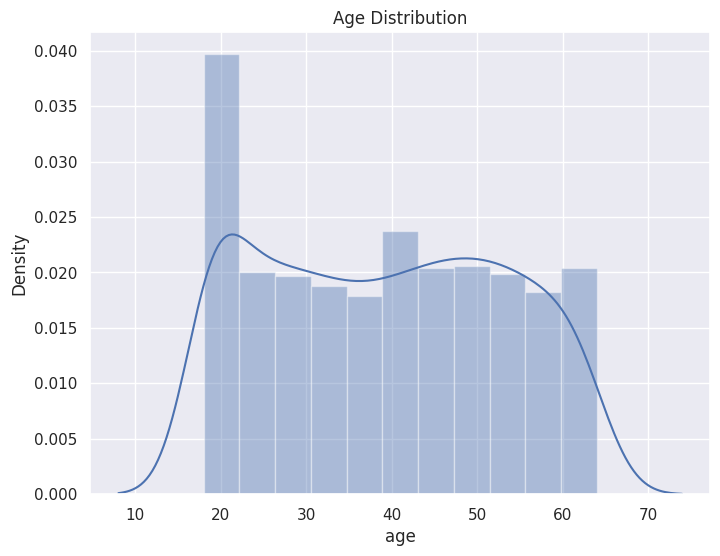

In [15]:
# distribution of age column

sns.set()
plt.figure(figsize=(8,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

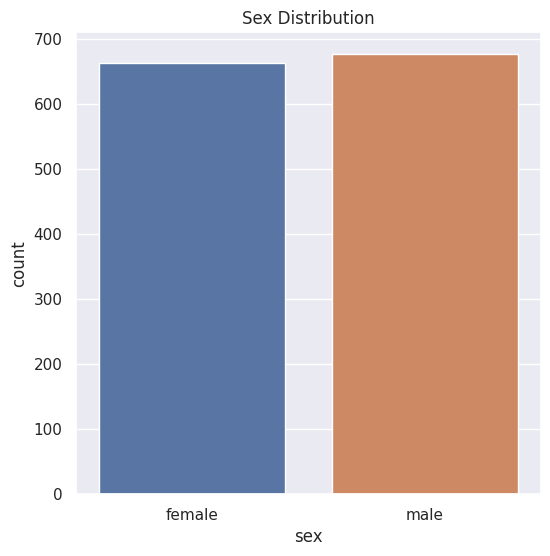

In [17]:
# distribution of sex column

plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [18]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

/tmp/ipykernel_33/1361582059.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


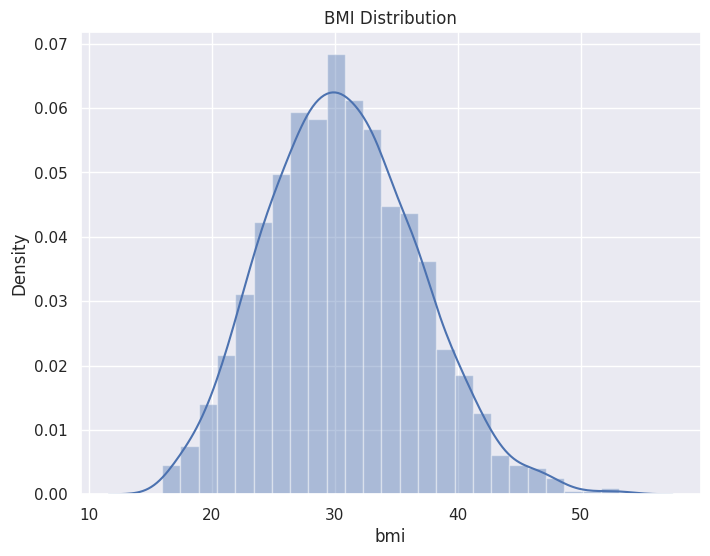

In [20]:
# distribution of bmi column
#** normal bmi range is 18.5 - 24.9

sns.set()
plt.figure(figsize=(8,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

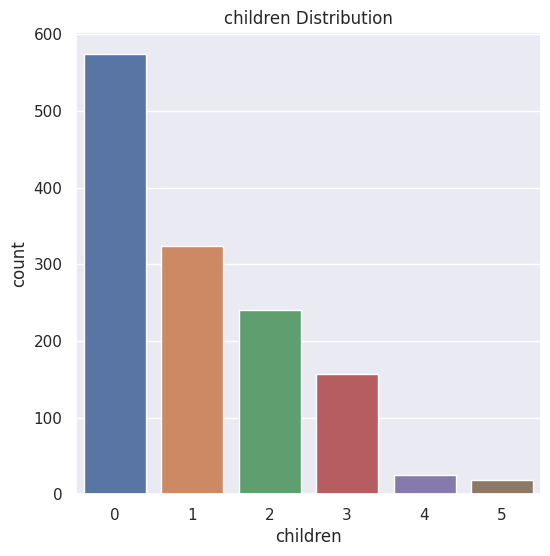

In [21]:
# distribution of children column

plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('children Distribution')
plt.show()

In [22]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

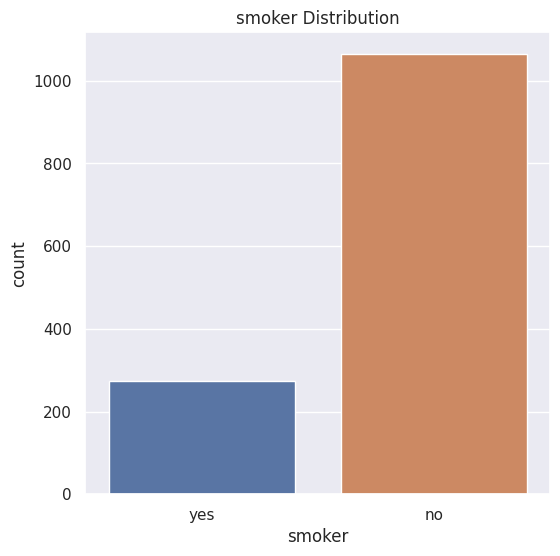

In [23]:
# distribution of smoker column

plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('smoker Distribution')
plt.show()

In [24]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

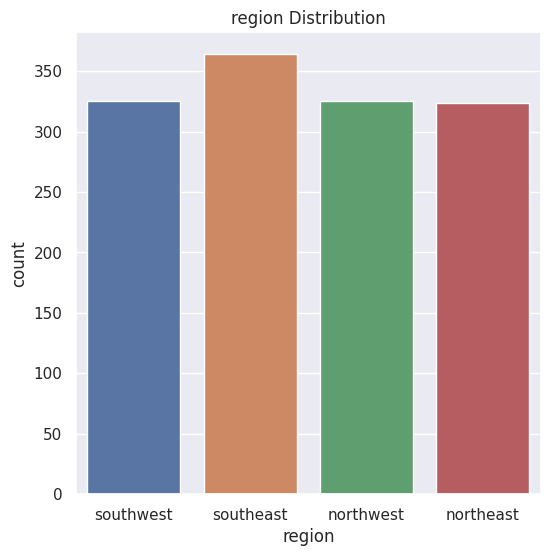

In [25]:
# distribution of region column

plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('region Distribution')
plt.show()

In [26]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

/tmp/ipykernel_33/4095682791.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


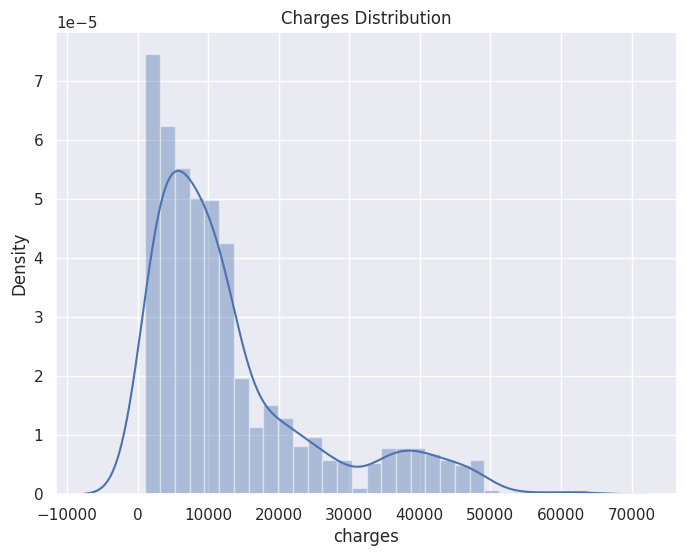

In [28]:
# distribution of charges column

sns.set()
plt.figure(figsize=(8,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

**Data pre-processing**

Encoding categorical features

In [31]:
# Encoding sex column
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

# Encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

# Encoding region column
df.replace({'region':{'southeast':0, 'southwest':1, 'northwest':2, 'northeast':3}}, inplace=True)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


**Splitting the features and target**

In [32]:
X = df.drop(columns='charges', axis=1)
Y = df['charges']

In [35]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [36]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


**Splitting data into train and test data**

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


**Model training: Linear Regression**

In [39]:
# Instantiate LinearRegression

lr = LinearRegression()

In [41]:
# fit the LinearRegression model

lr.fit(X_train, y_train)

LinearRegression()

**Model evaluation**

In [43]:
# prediction on train data

train_data_pred = lr.predict(X_train)

In [45]:
# R-squared value on train data

r2_train = metrics.r2_score(y_train, train_data_pred)

print('R-squared value:', r2_train)

R-squared value: 0.7533832242651963


In [46]:
# prediction on test data

test_data_pred = lr.predict(X_test)

In [47]:
# R-squared value on test data

r2_test = metrics.r2_score(y_test, test_data_pred)

print('R-squared value:', r2_test)

R-squared value: 0.7398591734145537


**Making a predictive system**

In [51]:
data = [28,0,36.4,1,0,1]

# change the data (which is a tuple) to a numpy array
data_as_np_array = np.asarray(data)

#reshape the array (as we are only predicting one instance)
data_reshaped = data_as_np_array.reshape(1,-1)

prediction = lr.predict(data_reshaped)
print(prediction)

print('The insurance cost is USD:', prediction[0])

[30888.1812439]
The insurance cost is USD: 30888.18124390361


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
